##**Projet sur le COVID:**
Analyse et prédiction des infections COVID-19

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [ ]:
#Importation des données
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP6_SDN_COVID19/clean-hubei.csv',delimiter=',')
data.head()

,id,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id
0,1,15-88,male,Wuhan City,Hubei,China,30.596415,114.27978,point,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
1,2,15-88,male,Wuhan City,Hubei,China,30.596415,114.27978,point,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
2,3,15-88,male,Wuhan City,Hubei,China,30.596415,114.27978,point,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
3,4,15-88,male,Wuhan City,Hubei,China,30.596415,114.27978,point,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100
4,5,15-88,male,Wuhan City,Hubei,China,30.596415,114.27978,point,- 18.01.2020,NaN,20.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100


In [ ]:
data.dtypes

id                            int64
age                          object
sex                          object
city                         object
province                     object
country                      object
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_wuhan               object
travel_history_dates        float64
travel_history_location     float64
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion        float64
location                    float64
admin3                       object
admin2                      

**Valeurs manquantes:**

In [ ]:
val_man=data.isnull().sum()/data.shape[0]*100
val_man

id                            0.000000
age                          97.681302
sex                          99.023187
city                          0.000000
province                      0.000000
country                       0.000000
latitude                      0.000000
longitude                     0.000000
geo_resolution                0.000000
date_onset_symptoms          99.062654
date_admission_hospital      99.595461
date_confirmation             8.179576
symptoms                     99.615195
lives_in_wuhan               99.615195
travel_history_dates        100.000000
travel_history_location     100.000000
reported_market_exposure     99.990133
additional_information       99.782930
chronic_disease_binary       99.782930
chronic_disease              99.792797
source                        0.000000
sequence_available           99.980266
outcome                      99.585594
date_death_or_discharge      99.595461
notes_for_discussion        100.000000
location                 

In [ ]:
"""
Transformation en binaire de la variable 'chronic_disease_binary'
On met à 1 si la valeur de la variable chronic_disease est non nulle ou si
la valeur de la variable chronic_disease_binary elle meme vaut 1
On met à 0 pour les valeurs manquantes
"""
data.loc[:,'chronic_disease_binary']=np.where(data.loc[:,'chronic_disease'].isnull()==False,1,data.loc[:,'chronic_disease_binary'])
data.loc[:,'chronic_disease_binary']=data.loc[:,'chronic_disease_binary'].fillna(0)

In [ ]:
"""
Transformation en binaire de la variable 'symptoms'
On met à 1 si la valeur de la date de confirmation n'est pas nulle ou 
si la valeur de la date de début de symptoms n'est pas nulle 
On met à 0 si les 2 variables combinées ont pour valeur est nulle 
"""

data.loc[:,'date_confirmation']=data.loc[:,'date_confirmation'].fillna(0)
data.loc[:,'date_onset_symptoms']=data.loc[:,'date_onset_symptoms'].fillna(0)
data.loc[:,'symptoms']=np.where(data.loc[:,'date_confirmation'].isnull()==False,1,data.loc[:,'symptoms'])
data.loc[:,'symptoms']=np.where(data.loc[:,'date_onset_symptoms'].isnull()==False,1,data.loc[:,'symptoms'])
data.loc[:,'symptoms']=np.where(data.loc[:,'date_confirmation'].values==0,0,data.loc[:,'symptoms'])
data.loc[:,'symptoms']=data.loc[:,'symptoms'].fillna(0)

In [ ]:
"""
Transformation en binaire de la variable 'sex'
On met à 1 si la valeur est 'male' ou pour les valeurs manquantes la peronne vit à wuhan
On met à 0 si la valeur est 'femelle' ou pour les autres valeurs manquantes
"""
data.loc[:,'sex']=np.where(data.loc[:,'sex'].values=='male',1,data.loc[:,'sex'])
data.loc[:,'sex']=np.where(data.loc[:,'sex'].values=='female',0,data.loc[:,'sex'])
data.loc[:,'sex']=data.loc[:,'sex'].fillna(data.loc[:,'sex'].median())

In [ ]:
"""
Transformation en binaire de la variable 'lives_in_wuhan'
On met à 1 si la valeur est 'yes' ou pour les valeurs manquantes la peronne vit à wuhan
On met à 0 si la valeur est 'no' ou pour les autres valeurs manquantes
"""
data.loc[:,'lives_in_wuhan']=np.where(data.loc[:,'lives_in_wuhan'].values=='yes',1,data.loc[:,'lives_in_wuhan'])
data.loc[:,'lives_in_wuhan']=np.where(data.loc[:,'city'].values=='Wuhan City',1,data.loc[:,'lives_in_wuhan'])
data.loc[:,'lives_in_wuhan']=np.where(data.loc[:,'lives_in_wuhan'].values=='no',0,data.loc[:,'lives_in_wuhan'])
data.loc[:,'lives_in_wuhan']=data.loc[:,'lives_in_wuhan'].fillna(0)

In [ ]:
"""
Transformation en binaire de la variable 'outcome'
On met à 1 si la valeur est 'died'
On met à 0 si la valeur est 'discharged' ou pour les valeurs manquantes
"""
data.loc[:,'outcome']=np.where(data.loc[:,'outcome'].values=='died',1,data.loc[:,'outcome'])
data.loc[:,'outcome']=np.where(data.loc[:,'outcome'].values=='discharged',0,data.loc[:,'outcome'])
data.loc[:,'outcome']=np.where(data.loc[:,'outcome'].isnull()==True,0,data.loc[:,'outcome'])

In [ ]:
"""
Transformation de la variable 'age'
"""
data.loc[:,'age']=np.where(data.loc[:,'age'].values=='15-88',(15+88)//2,data.loc[:,'age'])
data.loc[:,'age']=np.where(data.loc[:,'age'].values=='21-39',(21+39)//2,data.loc[:,'age'])
data.loc[:,'age']=np.where(data.loc[:,'age'].values=='40-49',(40+49)//2,data.loc[:,'age'])
data.loc[:,'age']=np.where(data.loc[:,'age'].values=='50-59',(50+59)//2,data.loc[:,'age'])
data.loc[:,'age']=np.where(data.loc[:,'age'].values=='60-69',(60+69)//2,data.loc[:,'age'])
data.loc[:,'age']=np.where(data.loc[:,'age'].values=='70-82',(70+82)//2,data.loc[:,'age'])
data.loc[:,'age']=np.where(data.loc[:,'age'].values=='25-89',(25+89)//2,data.loc[:,'age'])
data.loc[:,'age']=data.loc[:,'age'].fillna(data.loc[:,'age'].median())

In [ ]:
"""
Transformation variable sequence available
"""
data.loc[:,'sequence_available']=np.where(data.loc[:,'sequence_available'].isnull()==False,1,data.loc[:,'sequence_available'])
data.loc[:,'sequence_available']=data.loc[:,'sequence_available'].fillna(0)

In [ ]:
data.loc[:,'age']=pd.to_numeric(data.loc[:,'age'], downcast='integer')
data.loc[:,'outcome']=pd.to_numeric(data.loc[:,'outcome'], downcast='integer')
data.loc[:,'symptoms']=pd.to_numeric(data.loc[:,'symptoms'], downcast='integer')

In [ ]:
"""
On supprime les colonnes qui sont pas représentatives ici.
En plus les colonnes 'chronic_disease','additional_information' 
sont déja représentées par la colonne 'chronic_disease_binary' 
donc on peut les supprimer
Aussi admin 1 n'a que Hubei comme valeur donc on la supprime
'reported_market_exposure' n'a qu'une seule donnée où on a une valeur le reste ce sont des valeurs manquantes
"""
data=data.drop(columns=['source','city','province','country','date_onset_symptoms','date_admission_hospital','date_confirmation','admin2','admin3',\
                        'location','notes_for_discussion','travel_history_dates','travel_history_location','id','admin_id',\
                        'geo_resolution','date_death_or_discharge','chronic_disease','additional_information','country_new','admin1','reported_market_exposure'])

In [ ]:
data.head()

,age,sex,latitude,longitude,symptoms,lives_in_wuhan,chronic_disease_binary,sequence_available,outcome
0,51,1.0,30.596415,114.27978,1,1,0.0,0,0
1,51,1.0,30.596415,114.27978,1,1,0.0,0,0
2,51,1.0,30.596415,114.27978,1,1,0.0,0,0
3,51,1.0,30.596415,114.27978,1,1,0.0,0,0
4,51,1.0,30.596415,114.27978,1,1,0.0,0,0


In [ ]:
#Question 1 (Correlation)
data.corr()

,age,sex,latitude,longitude,symptoms,lives_in_wuhan,chronic_disease_binary,sequence_available,outcome
age,1.000000,-0.107819,-0.009758,0.013840,-0.095090,0.034166,0.512736,0.007024,0.555218
sex,-0.107819,1.000000,0.017169,-0.022980,0.045416,-0.059353,-0.242494,-0.112584,-0.326516
latitude,-0.009758,0.017169,1.000000,-0.547967,0.040423,-0.279284,-0.012805,-0.003948,-0.017396
longitude,0.013840,-0.022980,-0.547967,1.000000,-0.013775,0.435980,0.019990,0.006163,0.023382
symptoms,-0.095090,0.045416,0.040423,-0.013775,1.000000,-0.006536,-0.136834,-0.047071,-0.187933
lives_in_wuhan,0.034166,-0.059353,-0.279284,0.435980,-0.006536,1.000000,0.045851,0.014137,0.060192
chronic_disease_binary,0.512736,-0.242494,-0.012805,0.019990,-0.136834,0.045851,1.000000,-0.000640,0.723888
sequence_available,0.007024,-0.112584,-0.003948,0.006163,-0.047071,0.014137,-0.000640,1.000000,0.111151
outcome,0.555218,-0.326516,-0.017396,0.023382,-0.187933,0.060192,0.723888,0.111151,1.000000


**Correlation:**

Les variables les plus correlés avec la cible 'outcome' sont les variables 'age':49.83%, 'Sex':32.65%  et 'chronic_disease_binary':72.38%

Vu la réelle situation de la pandémie on peut donc dire que ces résultats sont cohérents.

**REDUCTION DE DIMENSION**

Text(0.5, 1.0, 'Visulation du jeu de données avec PCA')

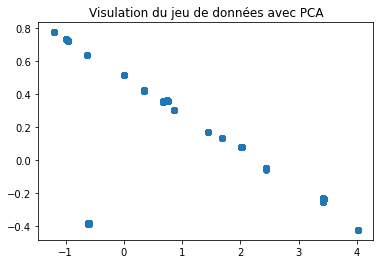

In [ ]:
data2=data.drop(columns=['age','sex','chronic_disease_binary'])
X=data2.drop(columns=['outcome'])
#ACP visualisation des données
pca = PCA(n_components=2)
dataPCA = pca.fit_transform(data2)

#Nuage de points PCA
plt.figure()
plt.scatter(dataPCA[:,0], dataPCA[:,1])
plt.title('Visulation du jeu de données avec PCA')



On pourrait tenter d'utiliser la LDA mais cette methode suppose que les données sont classées et que les classes suivent des distributions gaussiennes. Ce qui n'est certainement pas le cas avec ce dataset.

In [ ]:
Y=data.loc[:,'outcome']


Dans la suite, nous utilisons une méthode d'apprentissage automatique afin de prédire la classe : les patients
sont soit «décédés» (‘died’) soit «sortis» (‘discharged’) de l'hôpital. Vous pouvez utiliser la classification par
K-Nearest Neighbours (K-NN), l’arbre de decision ou le classificateur Bayes.
3. Les résultats obtenus doivent être validés en utilisant certains indices externes comme l’erreur de
prédiction (matrice de confusion et précision) ou d'autres comme Rappel, F-Measure, …

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Classification avec va non correlées KNN**

In [ ]:
from sklearn.model_selection import train_test_split
x=X
y=Y

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(x,y)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
Cnf_1=confusion_matrix(y_test, pred)
print(Cnf_1)

[[2525    0]
 [   9    0]]


**Classification avec va non correlés avec Bayes:**


In [ ]:
bay = GaussianNB()										#la fonction du Classifieur Bayesien Naïf inclut dans sklearn
pred2= bay.fit(X_train, y_train).predict(X_test)
Cnf_2=confusion_matrix(y_test, pred2)
print(Cnf_2)


[[1277 1248]
 [   1    8]]


**Classification avec va non correlés avec arbre de décision:**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
dtc=DecisionTreeClassifier()
pred3=dtc.fit(X_train,y_train).predict(X_test)
Cnf_3=confusion_matrix(y_test, pred3)
print(Cnf_3)


[[2525    0]
 [   9    0]]


**Commentaires**
<br/> On constate que l'arbre de décision et le KNN prédisent bien la classe died et rien est prédit pour la classe discharged.
<br/> Pour la CBN on a des précisions équilibrées mais on ne peut pas s'y fier car la CBN suppose que les classes ont une distribution gaussienne.  

4. Utilisez la régression pour prédire l'âge (age) des personnes en fonction d'autres variables. Vous avez le
choix sur ces variables explicatives ? Comment choisissez-vous ces variables ? Calculez la qualité de la
prédiction à l'aide de l'erreur MSE (Mean Squared Error).

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
Y1=data.loc[:,'age'].values

In [ ]:
x1=data.drop(columns=['sex','outcome','age'])
y1=Y1

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(x1,y1)
X_train1=ss.fit_transform(X_train1)
X_test1=ss.transform(X_test1)

In [ ]:
# Create linear regression object
regr1 = LR()

# Train the model


# Make predictions 
pred_reg = regr1.fit(X_train1, y_train1).predict(X_test1)

# The coefficients
print('Coefficients: \n', regr1.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test1, pred_reg))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, pred_reg))

Coefficients: 
 [-0.00100635 -0.00452291 -0.04469437  0.02322007  1.00547584  0.07802512]
Mean squared error: 3.31
Coefficient of determination: 0.14


**Commentaires:**

Le MSE de 1.84 montre que les age ne peut pas etre prédit par les autres variables qui lui sont pas correlées. 

5. Appliquer trois méthodes de clustering (K-means, NMF et CAH) sur l'ensemble de données pour
segmenter les personnes en différents groupes. Utilisez l'index de Silhouette pour connaître le meilleur
nombre de clusters.

**K-means**

In [ ]:
data_=ss.fit_transform(data)

le meilleur nombre de clusters pour KMEANS est : 2


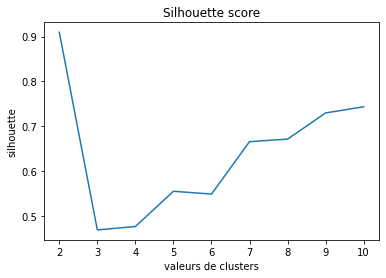

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette1=[]
for i in range(2,11):
  y_predict=KMeans(n_clusters=i,random_state=2).fit(data_).labels_
  silhouette1.append(silhouette_score(data_, y_predict))

print("le meilleur nombre de clusters pour KMEANS est :",np.argmax(silhouette1)+2)
plt.figure()
plt.plot(range(2,11),silhouette1)
plt.title('Silhouette score')
plt.xlabel('valeurs de clusters')
plt.ylabel('silhouette')
plt.show()

**NMF**

le meilleur nombre de clusters pour NMF est : 2


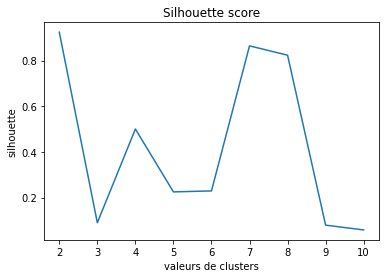

In [ ]:
from sklearn.decomposition import NMF

silhouette2=[]
for i in range(2,11):
  W=NMF(n_components=i,init='random',random_state=0).fit_transform(data)
  y_predict=np.argmax(W,axis=1)
  silhouette2.append(silhouette_score(data, y_predict))

print("le meilleur nombre de clusters pour NMF est :",np.argmax(silhouette2)+2)
plt.figure()
plt.plot(range(2,11),silhouette2)
plt.title('Silhouette score')
plt.xlabel('valeurs de clusters')
plt.ylabel('silhouette')
plt.show()

**CAH**

le meilleur nombre de clusters pour CAH est : 2


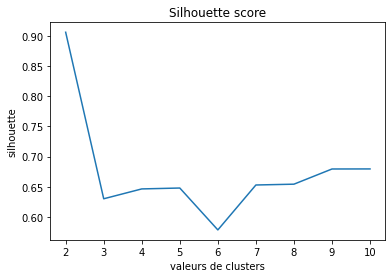

In [ ]:
from sklearn.cluster import AgglomerativeClustering as CAH

silhouette3=[]
for i in range(2,11):
  model=CAH(n_clusters=i).fit(data)
  y_predict=model.labels_
  silhouette3.append(silhouette_score(data, y_predict))

print("le meilleur nombre de clusters pour CAH est :",np.argmax(silhouette3)+2)
plt.figure()
plt.plot(range(2,11),silhouette3)
plt.title('Silhouette score')
plt.xlabel('valeurs de clusters')
plt.ylabel('silhouette')
plt.show()

6.Visualisez les  résultats  à  l'aide  de  scatter  pour  analyser   visuellement  la  structure  de  clustering des  trois méthodes

**KMEANS**

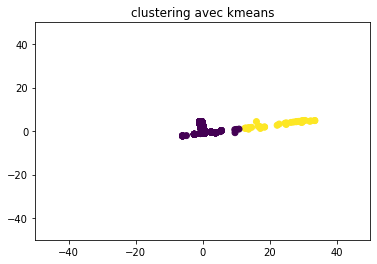

In [ ]:
data3=pca.fit_transform(data_)
y_kmeans=KMeans(n_clusters=2,random_state=2).fit(data3).labels_
plt.scatter(data3[:,0],data3[:,1],c=y_kmeans)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.title('clustering avec kmeans')
plt.show()

**NMF**

On ne peut pas faire du NMF car le PCA appliqué à data donne des valeurs négatives

**CAH**

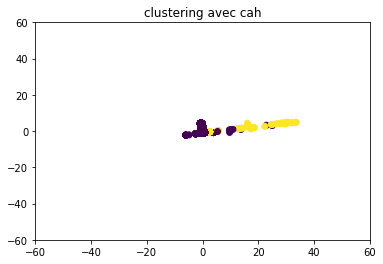

In [ ]:
y_cah=CAH(n_clusters=2).fit(data).labels_
plt.scatter(data3[:,0],data3[:,1],c=y_cah)
plt.xlim(-60,60)
plt.ylim(-60,60)
plt.title('clustering avec cah')
plt.show()


7.Les  données  sont  déséquilibrées.  Vous  pouvez  les équilibrer  en  réduisant  aléatoirement  la  classe majoritaire. Supposons que vous extrayez aléatoirement des échantillons équilibrés. Comment les résultats de la prédiction changeront-ils?

Lorsque les données sont déséquilibrées, la classe minoritaire n'est pas bien prédite ou bien elle n'est pas prédite du tout. Lorsqu'on les equilibre, on devrait avoir des classes ayant toutes les deux presque la même précision. Par contre on s'éloigne de la réalité

8.Comment pouvez-vous mieux gérer ce déséquilibre entre les classes ? 

9. Pour trouver les meilleurs paramètres pour les modèles, l'algorithme Greedy Search peut être utilisé,
disponible dans la bibliothèque scikit-learn. Expliquez l'algorithme et utilisez-le pour les modèles
d'apprentissage choisis afin de trouver les meilleurs paramètres.

In [ ]:
from sklearn.model_selection import GridSearchCV

#KNN grid
knn_grid_params={'n_neighbors':[3,4,5],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_grid_params,verbose=1,cv=3,n_jobs=-1)
knn_result=knn_grid.fit(X_train, y_train)
print(knn_result.best_score_)
print(knn_result.best_estimator_)
print(knn_result.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.995921606434112
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    5.5s finished


In [ ]:
#Decisiontreeclassifier grid
dt_params = {'criterion': ['gini', 'entropy'],\
             'splitter': ['best', 'random'],\
             'max_depth': [3, 10, 25, 40, 50],\
             'min_samples_split': [2, 10, 25, 50, 50],\
             'min_samples_leaf': [1, 10, 25, 50, 50],\
             'max_features': ['auto', 'log2', None]}

DT_grid = GridSearchCV(DecisionTreeClassifier(), dt_params,cv=10)
DT_result=DT_grid.fit(X_train, y_train)
print(DT_result.best_score_)
print(DT_result.best_estimator_)
print(DT_result.best_params_)

0.9959217442423405
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


**Explication Grid Search**

GridSearch est un processus de réglage des hyper paramètres afin de déterminer les valeurs optimales pour un modèle donné. Ceci est important car les performances de l'ensemble du modèle sont basées sur les valeurs d'hyper paramètre spécifiées.

Par exemple si on utilise le KNN comme modèle, l'algorithme prend en entré le modèle à utiliser,les paramètres. Ici ces paramètres sont:
- **n_neighbors**, qui est le nombre de voisins
- **des poids** qui peuvent être réglés soit sur **«uniforme»**, où chaque voisin à l’intérieur de la frontière porte le même poids, soit sur **«distance»** où les points les plus proches seront plus fortement pondérés dans la décision. 
- **metric** qui fait référence à la façon dont la distance des points voisins est choisie à partir du point inconnu. La modélisation étant généralement effectuée dans plus de 3 dimensions, cela peut être difficile à visualiser.

Un processus de validation croisée est effectué ici 3 afin de déterminer l'ensemble de valeurs d'hyper-paramètre qui fournit les meilleurs niveaux de précision.

Nous utilisons ensuite le meilleur ensemble de valeurs d'hyper-paramètres choisi dans la recherche de grille, dans le modèle réel comme indiqué ci-dessus

10. Présentez et expliquez le formalisme algorithmique et mathématique de la méthode qui donne les meilleurs
résultats. Expliquez tous les paramètres de la méthode utilisée et leur impact sur les résultats.

La méthode qui donne les meilleurs résultats est la cross validation.

La validation croisée à k blocs, « k-fold cross-validation » : 
- On divise l'échantillon original en k échantillons (ou « blocs »), puis on sélectionne un des k échantillons comme ensemble de validation pendant que les k-1 autres échantillons constituent l'ensemble d'apprentissage. 
- Après apprentissage, on peut calculer une performance de validation. Puis on répète l'opération en sélectionnant un autre échantillon de validation parmi les blocs prédéfinis.
- À l'issue de la procédure nous obtenons ainsi k scores de performances, un par bloc. La moyenne et l'écart type des k scores de performances peuvent être calculés pour estimer le biais et la variance de la performance de validation.